In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r'C:\Users\Mohamed Fawzi\Desktop\Product Sales Analysis\sales_data_cleaned.csv')

df.head(2)

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,...,customername,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize,month
0,10107,30,95.70,2,2871.0,2003-02-24,Shipped,1,2,2003,...,Land of Toys Inc.,NYC,NY,10022,USA,North America,Yu,Kwai,Small,February
1,10121,34,81.35,5,2765.9,2003-05-07,Shipped,2,5,2003,...,Reims Collectables,Reims,Unknown,51100,France,EMEA,Henriot,Paul,Small,May


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ordernumber       2823 non-null   int64  
 1   quantityordered   2823 non-null   int64  
 2   priceeach         2823 non-null   float64
 3   orderlinenumber   2823 non-null   int64  
 4   sales             2823 non-null   float64
 5   orderdate         2823 non-null   object 
 6   status            2823 non-null   object 
 7   qtr_id            2823 non-null   int64  
 8   month_id          2823 non-null   int64  
 9   year_id           2823 non-null   int64  
 10  productline       2823 non-null   object 
 11  msrp              2823 non-null   int64  
 12  productcode       2823 non-null   object 
 13  customername      2823 non-null   object 
 14  city              2823 non-null   object 
 15  state             2823 non-null   object 
 16  postalcode        2823 non-null   object 


## Monthly Sales Trend

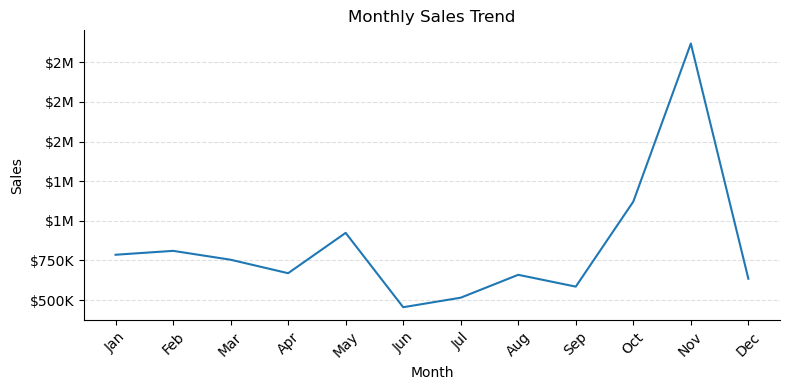

In [39]:
monthly_trend = df.groupby('month')['sales'].sum().reset_index().round(2)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_trend['month'] = pd.Categorical(monthly_trend['month'], categories=month_order, ordered=True)
monthly_trend = monthly_trend.sort_values('month')
# convert month names to abbreviations to make the plot cleaner
monthly_trend['month'] = monthly_trend['month'].str[:3]


plt.figure(figsize=(8, 4))
sns.lineplot(
    data=monthly_trend, 
    x='month', 
    y='sales', 
    palette='viridis'
    )

def currency(x, pos):
    if x >= 1e6:
        return '${:,.0f}M'.format(x * 1e-6)
    else:
        return '${:,.0f}K'.format(x * 1e-3)
    
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)

sns.despine()
plt.tight_layout()
plt.show()


- The sales performance across the year shows **significant variation**, indicating potential seasonality or promotional impact.

## Key Observations
1. **Strongest Month:**
   - **November** experienced the highest spike in sales, surpassing **$2M**.
   - This likely corresponds with **seasonal promotions** such as Black Friday or early holiday shopping.

2. **Second Strongest Month:**
   - **October** also shows a notable increase in sales, over **$1M**, suggesting the buildup to peak season begins early.

3. **Weakest Month:**
   - **June** marked the lowest sales point, just below **$500K**.
   - This may indicate a **mid-year slump**, potentially due to lower consumer spending or limited marketing activities.

4. **Consistent Performance:**
   - Sales remained relatively stable between **January and May**, ranging around **$700K–$900K**.
   - Indicates a **moderate baseline** level of activity in the first half of the year.

5. **Sudden Drop in December:**
   - After peaking in November, **sales dropped sharply in December**, down to levels similar to early in the year.
   -----------

##  Quarterly & Yearly Trend

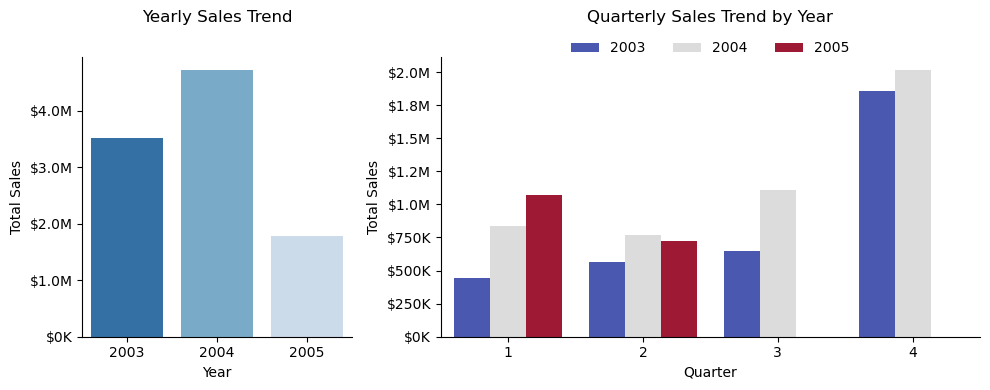

In [50]:
import matplotlib.gridspec as gridspec

yearly_sales = df.groupby('year_id')['sales'].sum().reset_index()
qrt_yr_trend = df.groupby(['year_id', 'qtr_id'])['sales'].sum().reset_index()

fig = plt.figure(figsize=(10, 4))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2])

def currency(x, pos):
    if x >= 1e6:
        return '${:,.1f}M'.format(x * 1e-6)
    else:
        return '${:,.0f}K'.format(x * 1e-3)

# Yearly Sales Trend
ax0 = fig.add_subplot(gs[0])
sns.barplot(data=yearly_sales, x='year_id', y='sales', ax=ax0, palette='Blues_r', ci=False)
ax0.set_title("Yearly Sales Trend", pad=25)
ax0.set_xlabel("Year")
ax0.set_ylabel("Total Sales")
ax0.yaxis.set_major_formatter(currency)

# Quarterly Sales Trend
ax1 = fig.add_subplot(gs[1])
sns.barplot(data=qrt_yr_trend, x='qtr_id', y='sales', hue='year_id',ax=ax1, palette='coolwarm', ci=False)
ax1.set_title("Quarterly Sales Trend by Year", pad=25)
ax1.set_xlabel("Quarter")
ax1.set_ylabel("Total Sales")
ax1.yaxis.set_major_formatter(currency)

ax1.legend(loc='upper center', ncols=3, bbox_to_anchor=(0.5, 1.1), frameon=False)

sns.despine()
plt.tight_layout()
plt.show()


- Yearly and Quarterly Sales Trends

- Yearly Sales Trend:

  | Year | Total Sales |
  |------ | ----------- |
  | **2003** | ~$3.5M |
  | **2004** | ~$4.7M |
  | **2005** | ~$1.8M |

- Insights:
  - **2004** was the **peak year** with the **highest total sales**.
  - Sales **declined sharply** in **2005** — likely due to external factors or market changes.
  - The trend shows an **initial growth** followed by a **significant drop**.

  

- Quarterly Sales Trend by Year:

  | Quarter | 2003       | 2004       | 2005       |
  |--------- | ---------- | ---------- | ---------- |
  | **Q1**   | ~$500K     | ~$900K     | ~$1.1M     |
  | **Q2**   | ~$650K     | ~$850K     | ~$800K     |
  | **Q3**   | ~$700K     | ~$1.1M     | -          |
  | **Q4**   | ~$1.9M     | ~$2.0M     | -          |

- Insights:
  - **Q4** consistently had the **highest sales** across years, indicating strong **seasonality** — possibly linked to holiday or year-end demand.
  - In **2005**, **Q1 sales** were **higher** than in previous years, but **Q3 and Q4 data** seem **missing** or **nonexistent**.
  - **2004** showed a **strong performance in all quarters**, reinforcing it as the **best year overall**.

  ---





In [41]:
df_advanced = df.copy() # Create a copy of the original DataFrame for advanced analysis
# Convert 'orderdate' to datetime format
df_advanced['orderdate'] = pd.to_datetime(df_advanced['orderdate'])

In [42]:
# Resample data to daily/weekly/monthly level for trend analysis
df_advanced.set_index('orderdate', inplace=True)
monthly_sales = df_advanced['sales'].resample('M').sum()

### Now let's analyze the monthly sales trends and their 3-month rolling average, which will help to identify trends in noisy data.

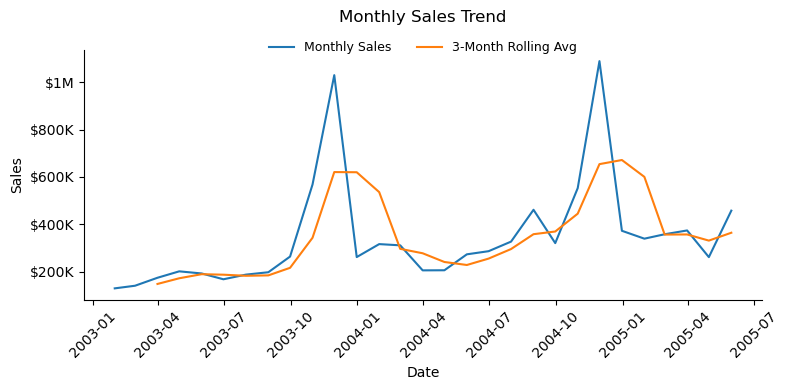

In [43]:
rolling_avg = monthly_sales.rolling(window=3).mean()

plt.figure(figsize=(8, 4))

sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, label='Monthly Sales')
sns.lineplot(x=rolling_avg.index, y=rolling_avg.values, label='3-Month Rolling Avg')

plt.gca().yaxis.set_major_formatter(FuncFormatter(currency)) # function definied earlier...

plt.title('Monthly Sales Trend', pad=20)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(ncols=2, fontsize=9, loc='upper center', bbox_to_anchor=(0.5, 0, 0, 1.08), frameon=False)

sns.despine()
plt.tight_layout()
plt.show()

- The chart visualizes monthly sales from **2003 to mid-2005** alongside a **3-month rolling average**, which smooths short-term fluctuations.

### **Key Observations**

1. **Seasonal Peaks**:
   - Major sales spikes are seen at the **end of each year**:
     - **Late 2003** and **late 2004** both show sharp peaks exceeding **$1M**.
   - These may correlate with **holiday seasons or end-of-year promotions**.

2. **Rolling Average Smoothing**:
   - The **3-month rolling average** clearly highlights **underlying trends**, removing noise from monthly fluctuations.
   - Peaks in the rolling average lag slightly behind actual monthly spikes, as expected with smoothing.

3. **Post-Peak Drop-offs**:
   - Following each year-end spike, there’s a **notable sales decline** in the first quarter.
   - Indicates a **post-holiday slump**, consistent with reduced consumer demand after major sales periods.

4. **Mid-Year Stability**:
   - Sales during **mid-year months (Q2 and Q3)** show **relatively stable or modest growth**, with smaller fluctuations compared to year-end.

------



### Now, let's perform a seasonal decomposition of monthly sales using a multiplicative model to break it into 4 components, **Observes**, **Trend**, **Seasonal**, and **Residual**:
-   **Observed** : The raw monthly sales values.
-   **Trend** : Long-term movement in sales.
-   **Seasonal** : Repeating patterns within a year.
-   **Residuals** : Random noise or unexplained variability.

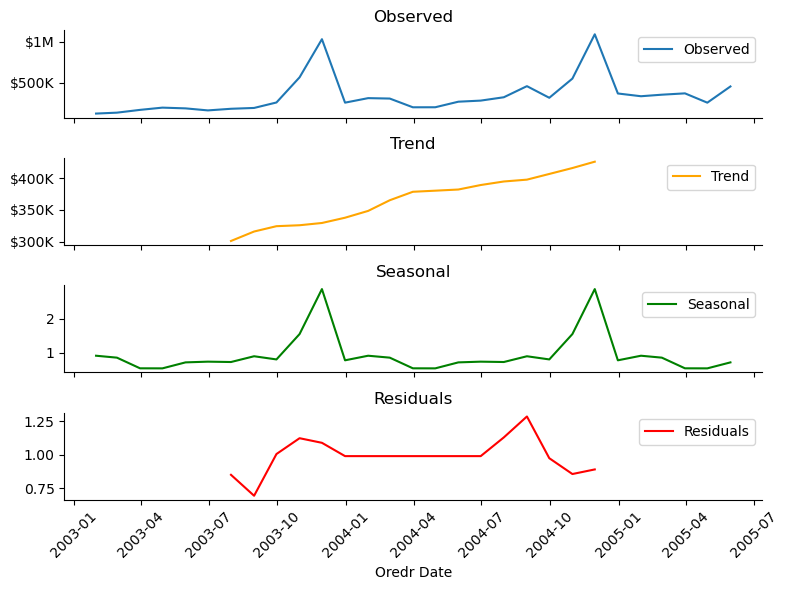

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(monthly_sales, model='multiplicative')

fig, axes = plt.subplots(4, 1, figsize=(8, 6), sharex=True)

sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, ax=axes[0], label='Observed')
axes[0].set_title('Observed')

sns.lineplot(x=result.trend.index, y=result.trend.values, ax=axes[1], label='Trend', color='orange')
axes[1].set_title('Trend')

sns.lineplot(x=result.seasonal.index, y=result.seasonal.values, ax=axes[2], label='Seasonal', color='green')
axes[2].set_title('Seasonal')

sns.lineplot(x=result.resid.index, y=result.resid.values, ax=axes[3], label='Residuals', color='red')
axes[3].set_title('Residuals')

axes[0].yaxis.set_major_formatter(FuncFormatter(currency))
axes[1].yaxis.set_major_formatter(FuncFormatter(currency))

plt.xlabel('Oredr Date')
plt.xticks(rotation=45)

sns.despine()
plt.tight_layout()
plt.show()


##  **Key Insights**:
This decomposition breaks down monthly sales into four components: **Observed**, **Trend**, **Seasonal**, and **Residuals**.

- Observed
    - The raw sales data shows clear **spikes in late 2003 and late 2004**, crossing **$1M**.
    - Reflects **sharp seasonal patterns** with significant peaks and dips, consistent with earlier monthly sales trend findings.

- Trend
    - A steady upward movement is seen from **early 2003 to mid-2005**.
    - The **trend component gradually increases**, rising from just above **$300K** to over **$400K**, suggesting **long-term growth** in sales performance.

- Seasonal
    - Shows a repeating **seasonal structure**, with **notable spikes** aligning with end-of-year months (likely Q4).
    - Seasonal values occasionally exceed **2x the baseline**, emphasizing the strong **seasonality effect** on total sales.

- Residuals
    - Residuals mostly hover between **0.75 and 1.25**, indicating **relatively low variance** beyond seasonality and trend.
    - A few brief periods (e.g., around **late 2004**) show higher residuals, suggesting **unexpected deviations**, possibly due to one-time events or promotions.

